## **Titanic 데이터셋의 피쳐 엔지니어링**

*"피쳐 엔지니어링: 변수를 조합하거나 새로운 변수를 만드는 과정"* 이라고 설명한 바 있습니다.

대표적인 방법으로는 두 가지가 있습니다.

- 피쳐 생성(Generation): 분석을 위한 새로운 피쳐 생성

- 피쳐 추출(Extraction): 기존 변수에서 새로운 변수를 만들어 변수를 줄이는 방법

이 중 피쳐 추출(Extraction) 하나만 같이 해보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv("C:/Users/UserPC/OneDrive/01 데이터셋/titanic_train_preprocessed.csv")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    object 
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
 11  Deck         891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB
None


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


여기서 SibSp와 Parch 열만 살펴보도록 하겠습니다.

각 열에 대한 설명을 찾아보면

- SibSp: Sibling, Spouse 즉, 동승한 형제자매 및 배우자 수

- ParCh: Parents, Child 즉, 동승한 부모 및 자녀 수

입니다. 

이 두 변수의 공통점은 모두 가족이라는 겁니다. 이를 Family라는 동승한 가족 수를 나타내는 변수로 합쳐 보겠습니다.
<br><br>

방법은 간단합니다. df라는 데이터프레임에서 SibSp열과 Parch열의 데이터를 더한 후, 이를 Family라는 새로운 열로 저장하기만 하면 되니까요.

In [3]:
df['Family'] = df['SibSp']+df['Parch']+1
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1


In [4]:
# 이제 필요없어진 Parch열과 SibSp 열을 제거해 줍니다. 

df.drop(columns = ['Parch','SibSp'], inplace=True)
df.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,Deck,Family
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",1,3,male,0.0,A/5 21171,M,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,1.0,PC 17599,ABC,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,3,female,1.0,STON/O2. 3101282,M,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,1.0,113803,ABC,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",5,3,male,0.0,373450,M,1


새로 만든 Family라는 변수에 대해 살펴보도록 합시다. 

In [5]:
df['Family'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

C:\Users\UserPC\AppData\Local\Temp\ipykernel_16092\2661871242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_counts.index, y=family_counts.values,


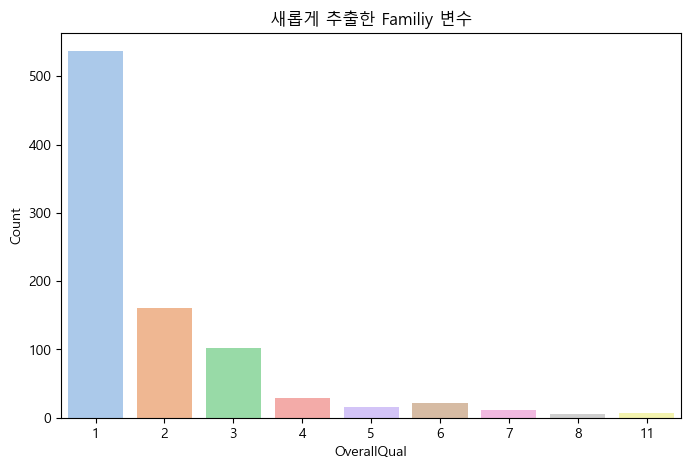

In [7]:
family_counts = df['Family'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=family_counts.index, y=family_counts.values, 
            palette=sns.color_palette('pastel', len(family_counts)), edgecolor = None)
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.title('새롭게 추출한 Familiy 변수')

plt.show()

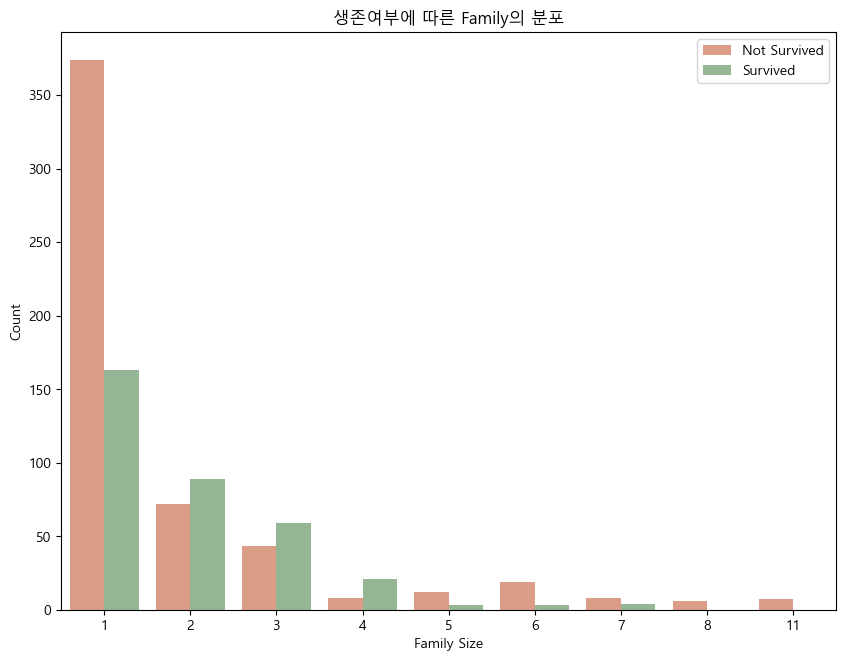

In [10]:
# 타겟열인 Survived에 대해 새로 만든 Family 변수 시각화
plt.figure(figsize=(10,7.5))

sns.countplot(x = 'Family',hue='Survived', data = df, palette=['darksalmon','darkseagreen'])
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('생존여부에 따른 Family의 분포')
plt.legend(['Not Survived','Survived'])

plt.show()